In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Feynn_Mcdonalds.csv')
df.head()

yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  
3        Yes    4   69         Once a week  Female  
4         No    2   49        Once a month    Male

In [13]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


(1453, 15)

In [15]:
df.describe(include='all')

yummy convenient spicy fattening greasy  fast cheap tasty expensive  \
count   1453       1453  1453      1453   1453  1453  1453  1453      1453   
unique     2          2     2         2      2     2     2     2         2   
top      Yes        Yes    No       Yes    Yes   Yes   Yes   Yes        No   
freq     803       1319  1317      1260    765  1308   870   936       933   
mean     NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
std      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
min      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
25%      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
50%      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
75%      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
max      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   

       healthy disgusting  Like          Age VisitFrequency  Gender  
count     1453       1453  1453  1453.000000           1453    1453  
unique       2          2    11          NaN              6       2  
top         No         No     3          NaN   Once a month  Female  
freq      1164       1100   229          NaN            439     788  
mean       NaN        NaN   NaN    44.604955            NaN     NaN  
std        NaN        NaN   NaN    14.221178            NaN     NaN  
min        NaN        NaN   NaN    18.000000            NaN     NaN  
25%        NaN        NaN   NaN    33.000000            NaN     NaN  
50%        NaN        NaN   NaN    45.000000            NaN     NaN  
75%        NaN        NaN   NaN    57.000000            NaN     NaN  
max        NaN        NaN   NaN    71.000000            NaN     NaN

In [10]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [21]:
df.duplicated().sum()

22

In [23]:
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [26]:
MD_x = df.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)

In [28]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.ensemble import RandomForestClassifier
from statsmodels.graphics.mosaicplot import mosaic

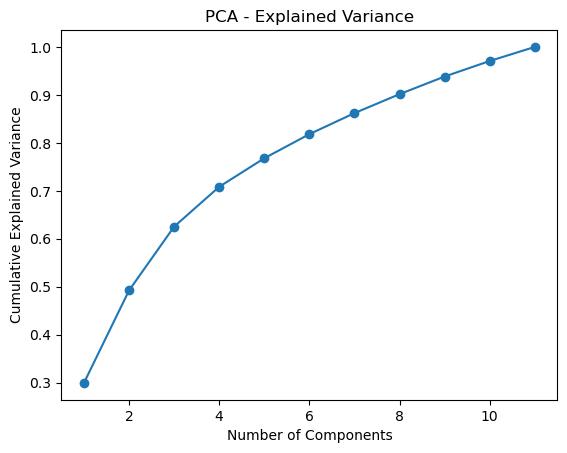

In [29]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()

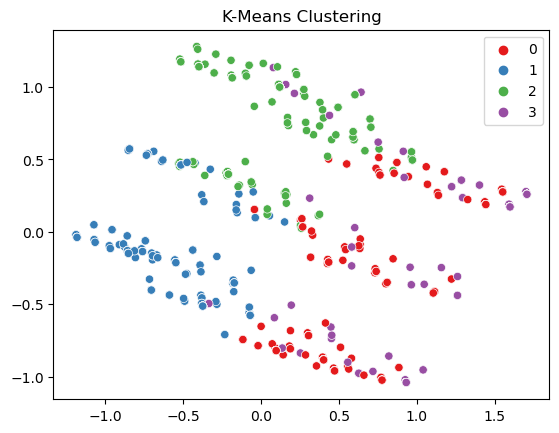

In [30]:
# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# K-Means clustering
best_k = 4  # Determined from plots and analysis
kmeans = KMeans(n_clusters=best_k, random_state=1234)
clusters = kmeans.fit_predict(MD_x_scaled)

# Plot K-Means results
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=clusters, palette='Set1')
plt.title('K-Means Clustering')
plt.show()

In [31]:
gmm = GaussianMixture(n_components=best_k, random_state=1234)
gmm_clusters = gmm.fit_predict(MD_x_scaled)

# Compare clustering results
pd.crosstab(clusters, gmm_clusters, rownames=['KMeans'], colnames=['GMM'])

GMM       0    1    2    3
KMeans                    
0         0   56    2  340
1        10  171  369   61
2         5   66  216   38
3       119    0    0    0

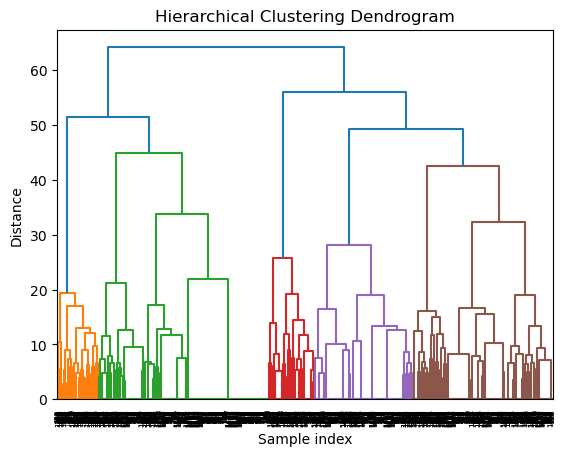

In [32]:
# Compute the distance matrix
distance_matrix = pdist(MD_x_scaled, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

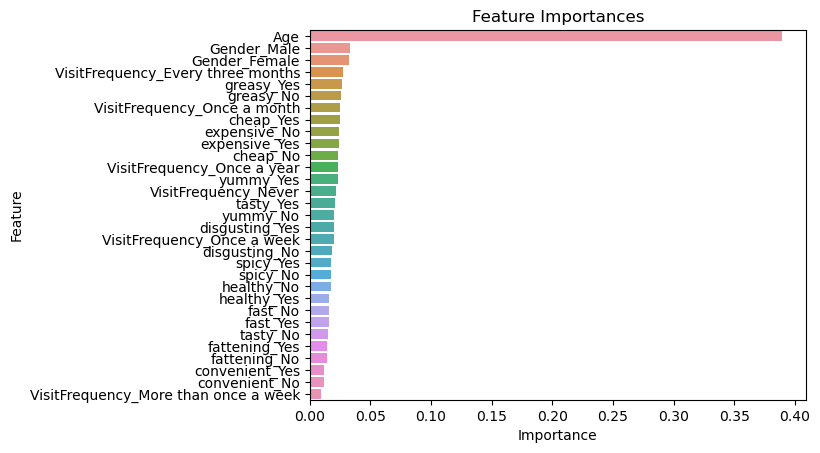

In [35]:


# Convert 'Like' into numerical values
df['Like_n'] = 6 - df['Like'].astype('category').cat.codes

# Drop 'Like' and 'Like_n' for feature matrix X
X = df.drop(['Like', 'Like_n'], axis=1)

# Convert categorical variables to dummy/one-hot encoded variables
X = pd.get_dummies(X)

# Target variable
y = df['Like_n']

# Fit a RandomForest model to cluster data
rf = RandomForestClassifier()
rf.fit(X, y)

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


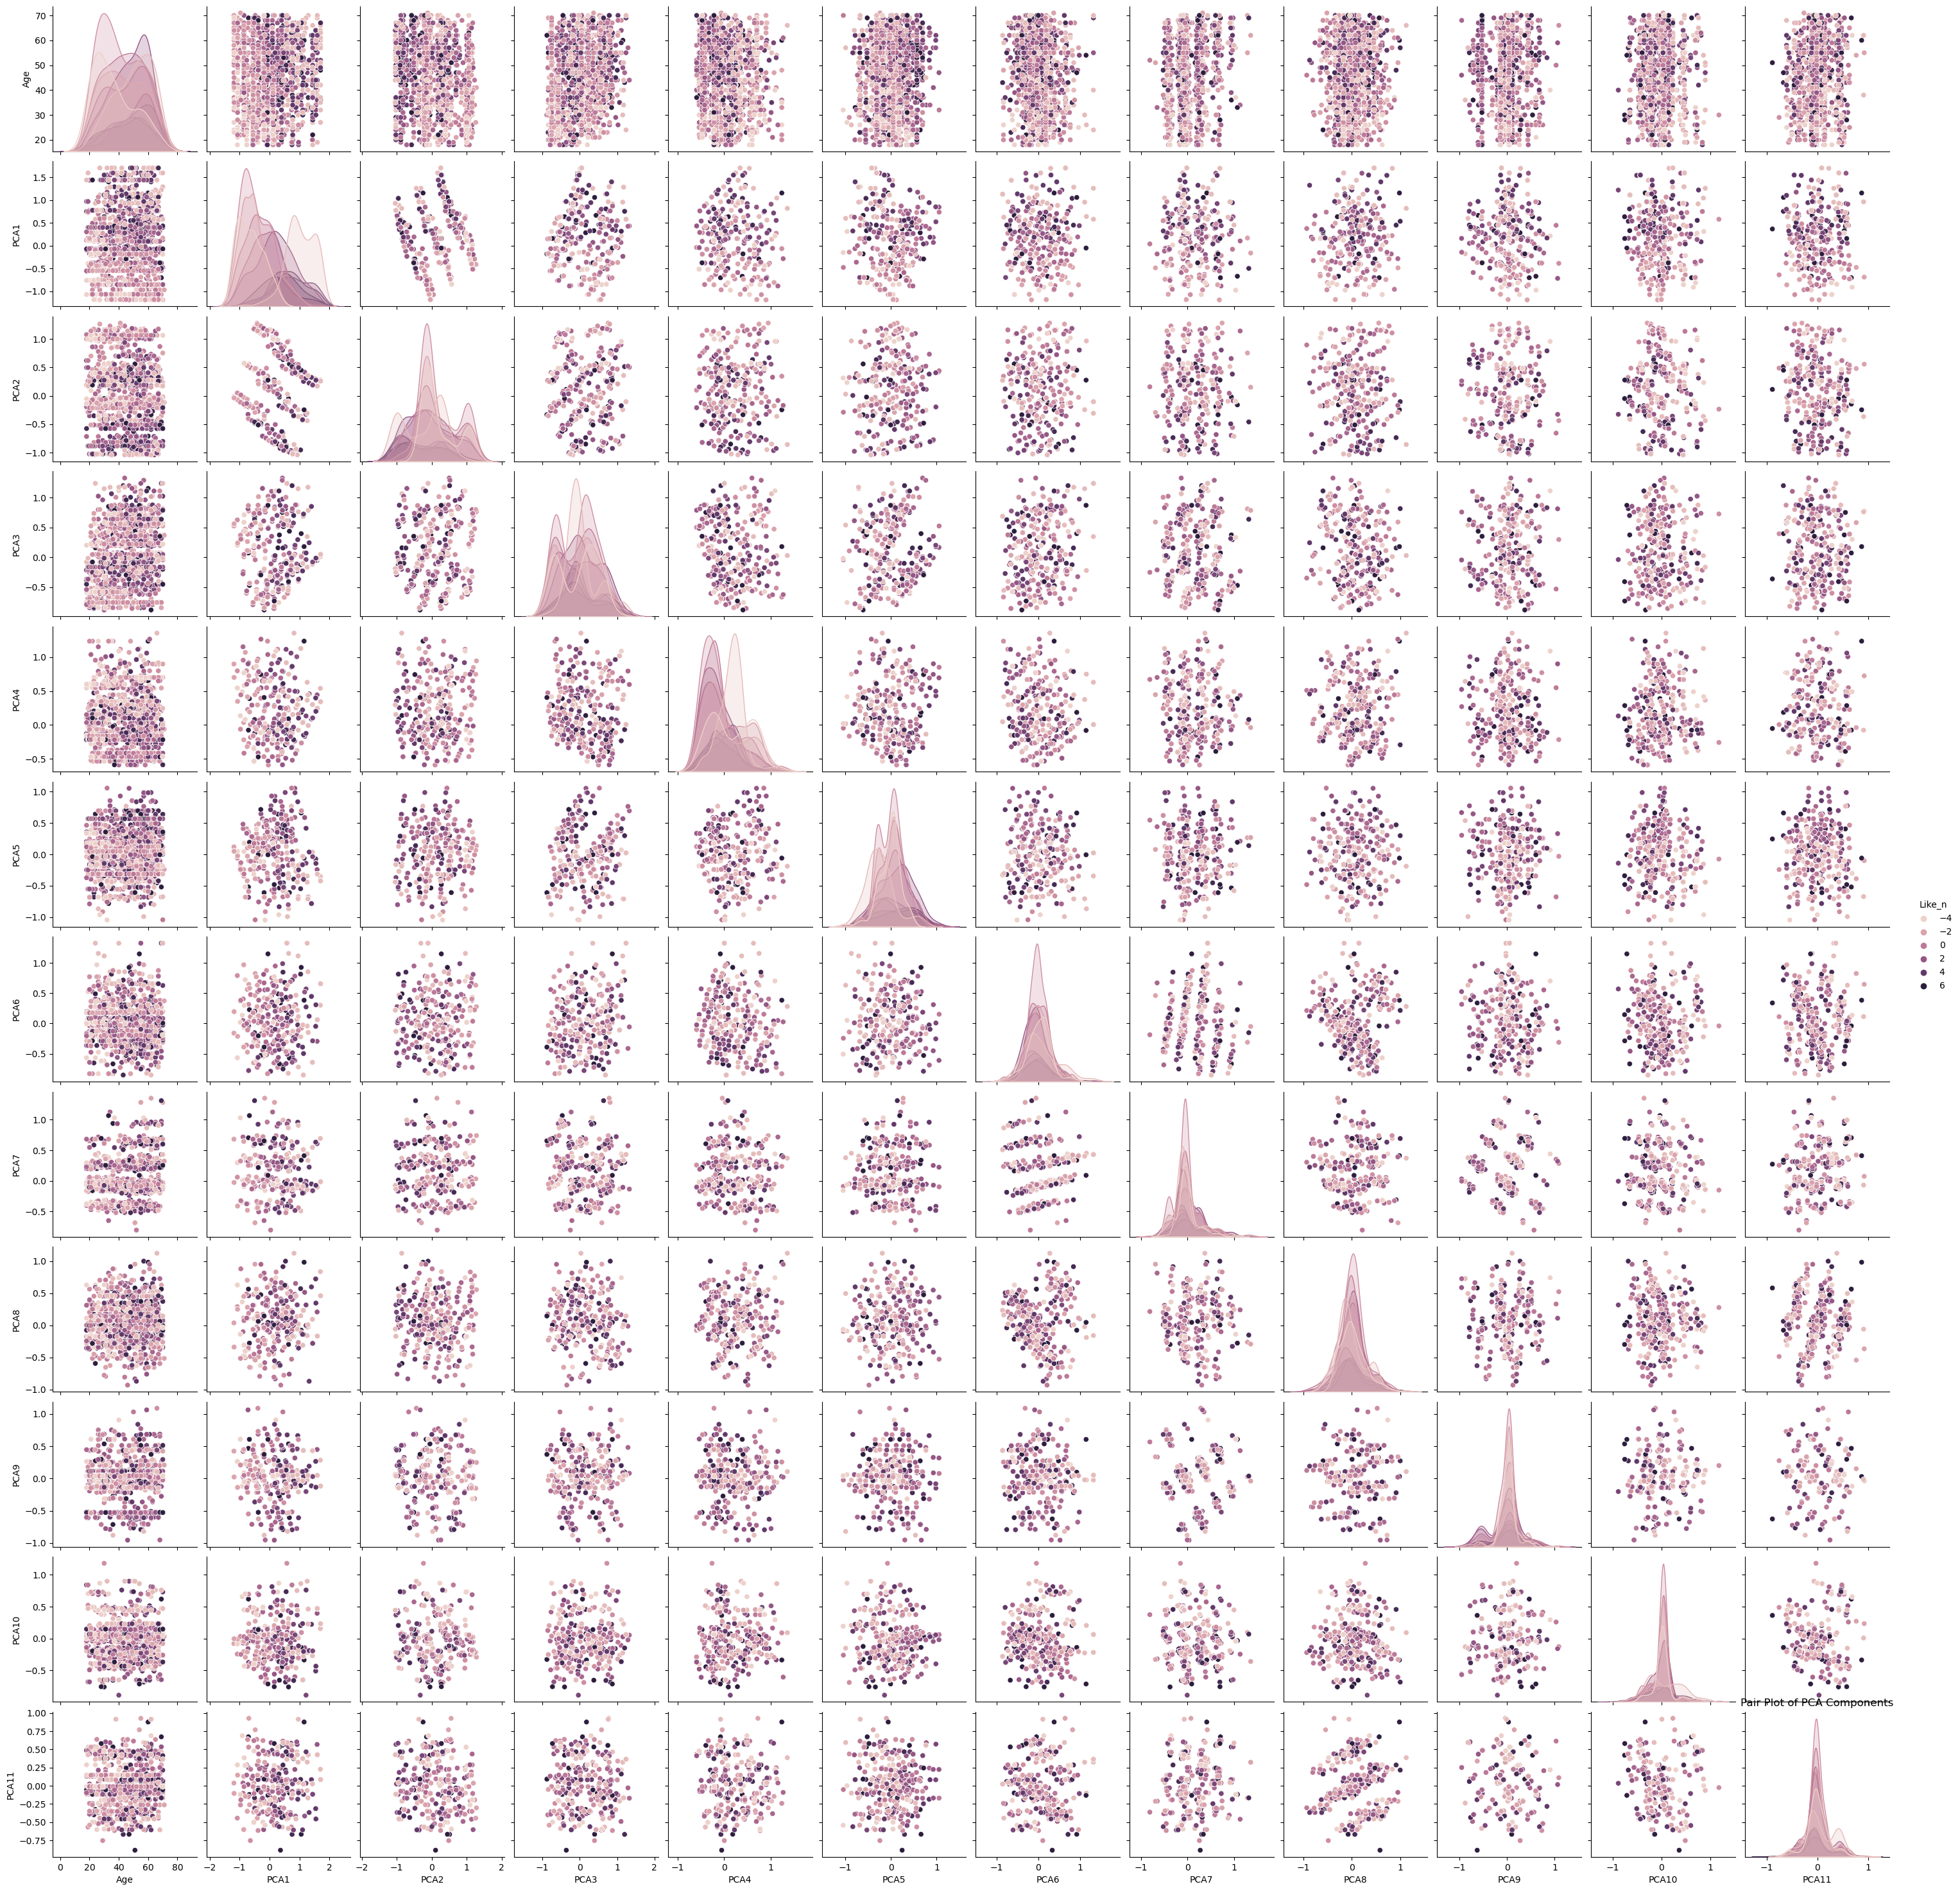

In [37]:
df_pca = df.copy()
df_pca = pd.concat([df_pca, pd.DataFrame(data=MD_pca, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11"])], axis=1)
sns.pairplot(df_pca, hue='Like_n')
plt.title('Pair Plot of PCA Components')
plt.show()

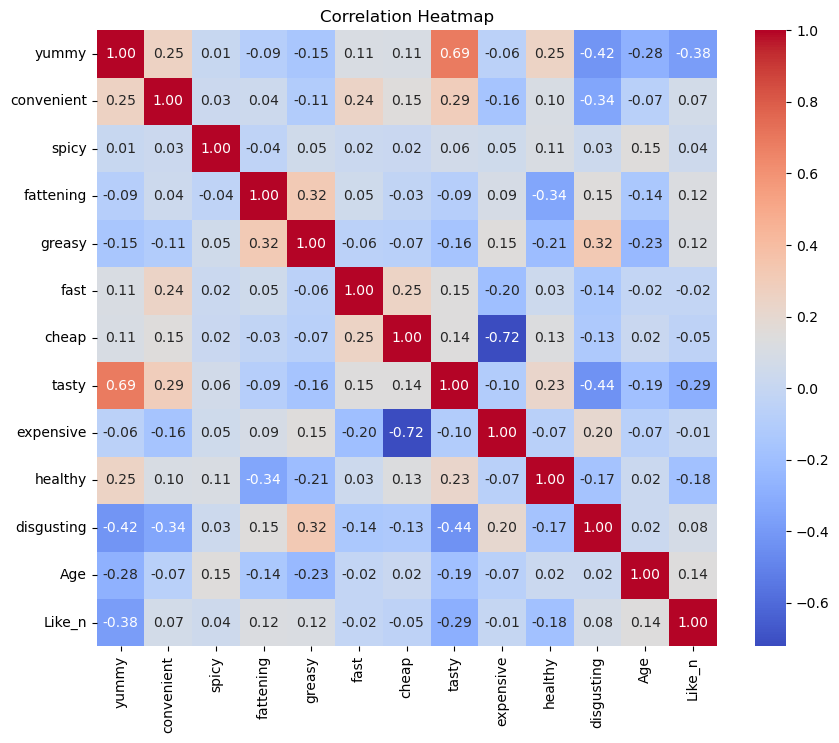

In [40]:
# Convert categorical columns to numeric (if not already done)
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for col in categorical_columns:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

# Drop non-numeric columns (if necessary)
df = df.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


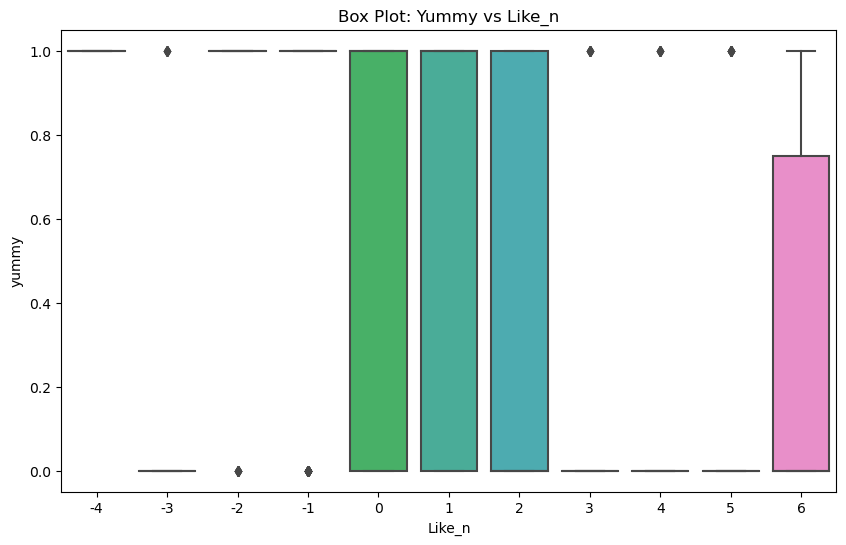

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Like_n', y='yummy', data=df)
plt.title('Box Plot: Yummy vs Like_n')
plt.show()